In [23]:
%pylab inline
%matplotlib inline
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['/Users/Argen/Documents/MAS/R&D/Code/pgm'])

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

import networkx as nx

from pgm.nodes.chance import Chance
from pgm.nodes.decision import Decision
from pgm.nodes.utility import Utility

Populating the interactive namespace from numpy and matplotlib
Python 2.7.10 |Anaconda 2.3.0 (x86_64)| (default, May 28 2015, 17:04:42) 
[GCC 4.2.1 (Apple Inc. build 5577)] on darwin


`%matplotlib` prevents importing * from pylab and numpy


In [24]:
def node_types(graph):
    chance = []
    decision = []
    utility = []
    
    for n in graph:
        if graph.node[n]['type'] == 'chance':
            chance.append(n)
        elif graph.node[n]['type'] == 'decision':
            decision.append(n)
        elif graph.node[n]['type'] == 'utility':
            utility.append(n)
    
    nodes = {'chance':chance, 'decision':decision, 'utility':utility}
    
    return nodes

In [25]:
def draw_graph(graph, pos=None, size=600, alpha=0.9, show=False, save=False):
    # 's' = square
    # 'D' = diamond
    # 'o' = circle

    title = graph.graph['title']

    plt.figure()
    plt.axis('off')

    if pos==None:
        p = nx.graphviz_layout(graph, prog='dot')
    else:
        p=pos

    node_dict = node_types(graph)
    chance, decision, utility = node_dict.get('chance'), node_dict.get('decision'), node_dict.get('utility')
    # print len(chance), len(decision), len(utility)
    
        
    if len(chance) > 0:
        nx.draw_networkx_nodes(graph, p, nodelist=chance, node_size=size, node_shape='o', alpha=alpha, node_color='w')
    if len(decision) > 0:
        nx.draw_networkx_nodes(graph, p, nodelist=decision, node_size=size, node_shape='s',alpha=alpha, node_color='g')
    if len(utility) > 0:
        nx.draw_networkx_nodes(graph, p, nodelist=utility, node_size=size, node_shape='D', alpha=alpha, node_color='r')

    nx.draw_networkx_edges(graph, pos=p)
    nx.draw_networkx_labels(graph, pos=p)

    if save:
        nx.write_dot(graph, title + '.dot')
        plt.savefig(title + '.png')

    if show:
        plt.show()

In [26]:
nodes = [('A', {'domain': ['T', 'F'], 'type': 'chance'}), ('C', {'domain': ['T', 'F'], 'type': 'chance'}), ('B', {'domain': ['T', 'F'], 'type': 'chance'}),
         ('E', {'domain': ['T', 'F'], 'type': 'chance'}), ('D', {'domain': ['T', 'F'], 'type': 'chance'}), ('G', {'domain': ['T', 'F'], 'type': 'chance'}), 
         ('F', {'domain': ['T', 'F'], 'type': 'chance'}), ('I', {'domain': ['T', 'F'], 'type': 'chance'}), ('H', {'domain': ['T', 'F'], 'type': 'chance'}), 
         ('K', {'domain': ['T', 'F'], 'type': 'chance'}), ('J', {'domain': ['T', 'F'], 'type': 'chance'}), ('L', {'domain': ['T', 'F'], 'type': 'chance'}), 
         ('D4', {'domain': ['d1', 'd2'], 'type': 'decision'}), ('D2', {'domain': ['d1', 'd2'], 'type': 'decision'}), 
         ('D3', {'domain': ['d1', 'd2'], 'type': 'decision'}), ('D1', {'domain': ['d1', 'd2'], 'type': 'decision'})]
edges = [('A', 'C'), ('A', 'B'), ('C', 'B'), ('C', 'E'), ('C', 'D'), ('B', 'D'), ('B', 'D1'), ('E', 'D'), ('E', 'G'), ('D', 'D1'), ('D', 'F'), ('G', 'I'), ('G', 'D2'), 
         ('F', 'H'), ('I', 'D4'), ('I', 'D2'), ('I', 'L'), ('H', 'K'), ('H', 'J'), ('H', 'D3'), ('K', 'J'), ('K', 'D3'), ('L', 'D4')]

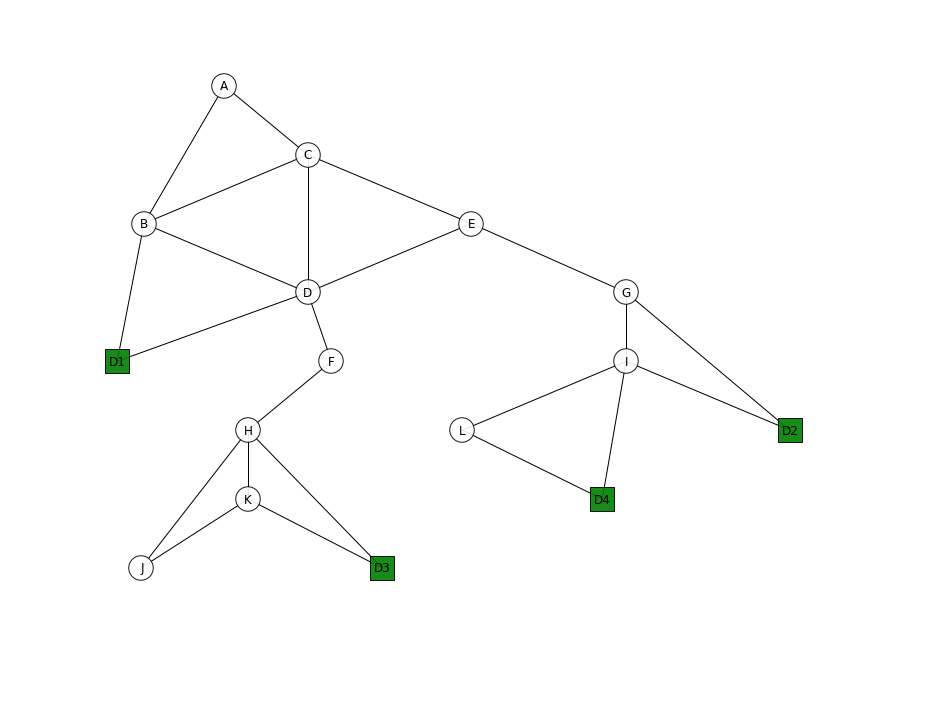

In [27]:
net = nx.Graph(title='influence_diagram')

net.add_nodes_from(nodes)
net.add_edges_from(edges)

pos = nx.graphviz_layout(net, prog='dot')
draw_graph(net, pos)

## Triangulated Graph

Get strong elimination order In, Dn, In-1, Dn-1...

1. Eliminate simplicial node X; fa(x) is a clique candidate

2. if fa(x) does not include all remaining nodes go to 1

3. prune the set of clique candidates by removing sets that are subsets of other clique candidates

You eliminate the variables in some order, and if you wish to eliminate a node with an incomplete neighbor set, you make it complete by adding fill-ins.

V is a set of variables

X € V, |sp(X)| denotes the number of states of X

sz(V) = product of |sp(X)|

Repeatedly eliminate a simplicial node, and if this is not possible, eliminate a node X of minimal sz(fa(X))

In [28]:
T = nx.DiGraph(title='triangulation_example')
T.add_nodes_from([('A', {'type': 'chance', 'domain': [1, 2]}), 
                  ('B', {'type': 'chance', 'domain': [1, 2]}),
                  ('C', {'type': 'chance', 'domain': [1, 2]}), 
                  ('D', {'type': 'chance', 'domain': [1, 2, 3, 4]}),
                  ('E', {'type': 'chance', 'domain': [1, 2, 3, 4, 5]}),
                  ('F', {'type': 'chance', 'domain': [1, 2, 3, 4, 5, 6]}), 
                  ('G', {'type': 'chance', 'domain': [1, 2, 3, 4, 5, 6, 7]}),
                  ('H', {'type': 'chance', 'domain': [1, 2]}), 
                  ('I', {'type': 'chance', 'domain': [1, 2]}),
                  ('J', {'type': 'chance', 'domain': [1, 2]})])
T.add_edges_from([('A', 'D'), ('B', 'D'), ('B', 'E'), ('C', 'E'), 
                  ('D', 'F'), ('E', 'G'), ('F', 'H'), ('F', 'I'), 
                  ('G', 'I'), ('G', 'J')])

pos_ex = nx.graphviz_layout(T,'dot')

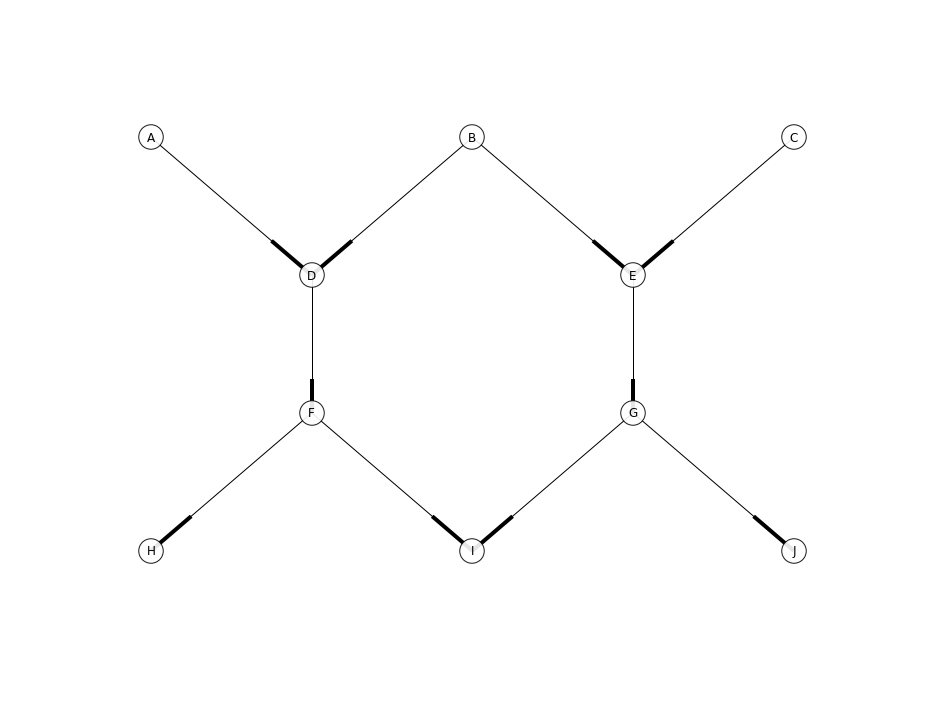

In [29]:
draw_graph(T, pos_ex)

{'A': {'domain': [1, 2], 'type': 'chance'}, 'C': {'domain': [1, 2], 'type': 'chance'}, 'B': {'domain': [1, 2], 'type': 'chance'}, 'E': {'domain': [1, 2, 3, 4, 5], 'type': 'chance'}, 'D': {'domain': [1, 2, 3, 4], 'type': 'chance'}, 'G': {'domain': [1, 2, 3, 4, 5, 6, 7], 'type': 'chance'}, 'F': {'domain': [1, 2, 3, 4, 5, 6], 'type': 'chance'}, 'I': {'domain': [1, 2], 'type': 'chance'}, 'H': {'domain': [1, 2], 'type': 'chance'}, 'J': {'domain': [1, 2], 'type': 'chance'}}


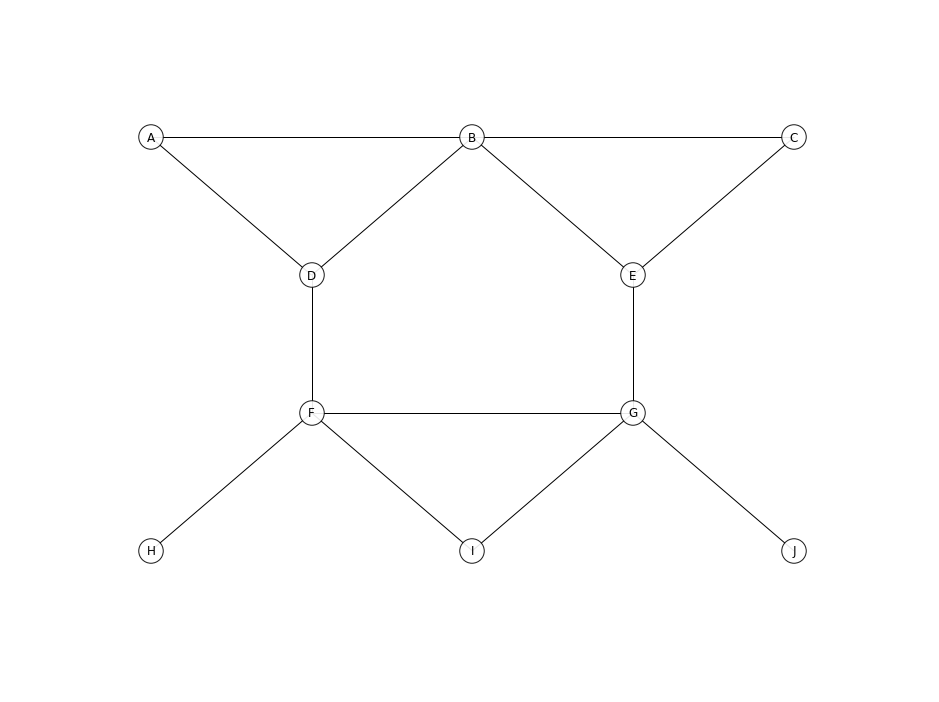

In [30]:
m = nx.Graph(T)
m.add_edges_from([('A','B'),('B','C'),('F','G')])
print m.node
draw_graph(m, pos_ex)

In [31]:
def sp(x):
    #return len(x[1]['domain'])
    return len(T.node[x]['domain'])

def sz(V):
    s = 1
    for v in V:
        s = s * sp(v)
    return s

def fa(g, x, data=False):
    f = [x]
    if data:
        for n in g.neighbors(x[0]):
            f.append((n, g.node[n]))
        return f
    else:
        f.extend(g.neighbors(x))
        return f

def nb(g, x, data=False):
    neigh = []
    if data:
        for n in g.neighbors(x[0]):
            neigh.append((n, g.node[n]))
        return neigh
    else:
        return g.neighbors(x)

def is_simplicial(g, x):
    f = fa(g, x)
    n = nb(g, x)
    s = g.subgraph(f)
    # draw_graph(s, pos_ex)
    
    if len(n)>1:
        t = []
        for e1, e2 in list(combinations(n, 2)):
            if g.has_edge(e1, e2) or g.has_edge(e2, e1):
                t.append(True)
            else:
                t.append(False)
        if sum(t) == len(t):
            return True
        else:
            return False
    else:
        return True

#print sz(['A', 'B'])

for n in T.nodes():
    # print n[0], sz(fa(m, n))
    print n, is_simplicial(m, n)

A True
C True
B False
E False
D False
G False
F False
I True
H True
J True


In [32]:
ugraph = m.copy()
# ugraph = moral_graph.copy()
# print len(self.ugraph.edges())

order = {'A':5,'B':0,'C':4,'D':0,'E':0,'F':0,'G':0,'H':3,'I':2,'J':1}
windows = {0:['A','B','C','D','E','F','G','H','I','J']}

print sorted(order,key=order.get,reverse=True)
print sorted(order)
print ugraph.edges()

nx.is_chordal(ugraph)

['A', 'C', 'H', 'I', 'J', 'B', 'E', 'D', 'G', 'F']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
[('A', 'B'), ('A', 'D'), ('C', 'B'), ('C', 'E'), ('B', 'E'), ('B', 'D'), ('E', 'G'), ('D', 'F'), ('G', 'I'), ('G', 'J'), ('G', 'F'), ('F', 'I'), ('F', 'H')]


False

In [33]:
for n, w in sorted(windows.items(), reverse=True):
    print w
    print n

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
0


In [34]:
w = ['A','B','C','D','E','F','G','H','I','J']
simplicial = [n for n in w if is_simplicial(ugraph,n)]
print simplicial

['A', 'C', 'H', 'I', 'J']


[['A', 'B', 'D'], ['C', 'B', 'E'], ['H', 'F'], ['I', 'G', 'F'], ['J', 'G']]


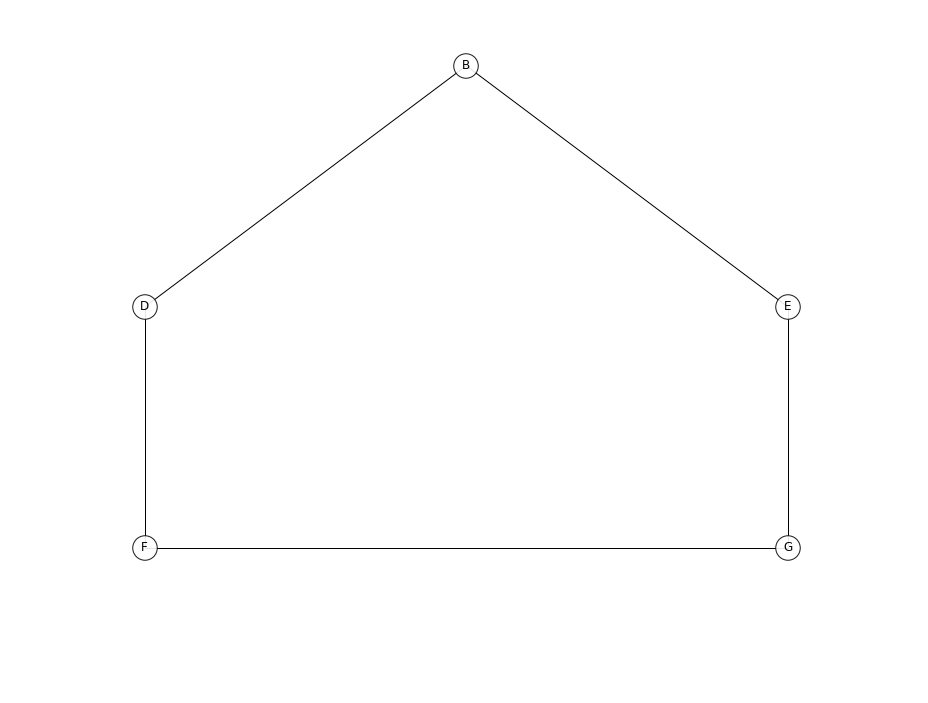

In [35]:
# Remove simplicial nodes
cliques =[]
t = ugraph.copy()

for n in simplicial:
    cliques.append(fa(ugraph,n))
    
print cliques
t.remove_nodes_from(simplicial)
draw_graph(t, pos_ex)

In [36]:
# print t.node
# remaining = t.nodes()
# size = {}
# for n in remaining:
    #size[n]=sz(fa(t,n))
t = ugraph.copy()

for n, w in sorted(windows.items(), reverse=True):
    size = {}
    for i in w:
        size[i] = sz(fa(t, i))
    print size

# print remaining
# print size

{'A': 16, 'C': 20, 'B': 160, 'E': 140, 'D': 96, 'G': 840, 'F': 672, 'I': 84, 'H': 12, 'J': 14}


In [37]:
t = ugraph.copy()
fill_ins = []
cliques = []

for n, w in sorted(windows.items(), reverse=True):
    size = {}
    for i in w:
        size[i] = sz(fa(t, i))

    while size != {}:
        # Remove simplicial nodes
        simplicial = [n for n in size if is_simplicial(t, n)]

        if len(simplicial) > 0:
            # print len(size), simplicial, t.nodes()

            for n in simplicial:
                f = fa(t,n)
                subset = filter(lambda x: set(f)< set(x), cliques)
                if subset == []:
                    cliques.append(f)
                t.remove_node(n)
                size.pop(n)
            # print t.nodes()
        else:
            # print len(size),t.nodes()
            for i in size:
                size[i] = sz(fa(t, i))

            if len(size) > 0:
                candidate = min(size, key=size.get)
                # s = t.subgraph(fa(t, candidate))
                neigh = nb(t, candidate)

                # print list(combinations(n, 2))
                fill = []
                # TODO: Algo esta mal con los cliques
                for e1, e2 in list(combinations(neigh, 2)):
                    if not t.has_edge(e1, e2) or not t.has_edge(e2, e1):
                        # print candidate, e1, e2
                        t.add_edge(e1, e2)
                        fill_ins.append((e1, e2))
                        
                f = fa(t,candidate)
                subset = filter(lambda x: set(f)< set(x), cliques)
                if subset == []:
                    cliques.append(f)
                t.remove_node(candidate)
                size.pop(candidate)
                # print candidate, t.nodes()

        # draw_graph(t, pos_ex)

# print windows
print cliques
print fill_ins

[['A', 'B', 'D'], ['C', 'B', 'E'], ['I', 'G', 'F'], ['H', 'F'], ['J', 'G'], ['B', 'E', 'D'], ['D', 'E', 'F'], ['E', 'G', 'F']]
[('E', 'D'), ('E', 'F')]


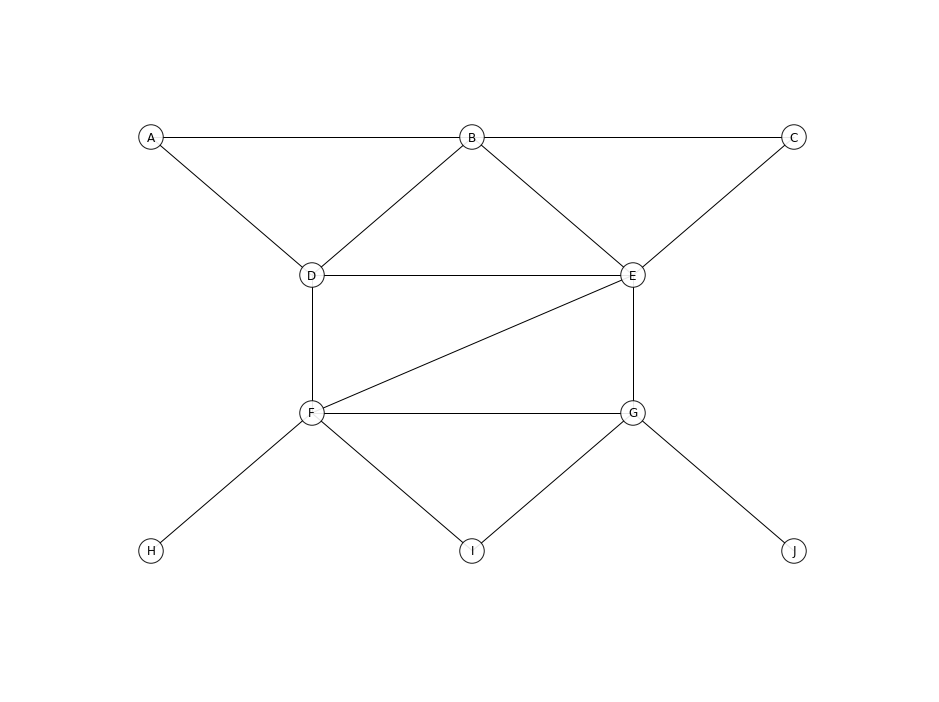

In [38]:
triangulated = ugraph.copy()
triangulated.add_edges_from(fill_ins)
draw_graph(triangulated, pos_ex)

### Directed chordal graph

A(8) - B(0)
A(8) - D(8)
C(8) - B(0)
C(8) - E(2)
B(0) - E(2)
B(0) - D(8)
E(2) - G(6)
D(8) - F(2)
G(6) - I(8)
G(6) - J(8)
G(6) - F(2)
F(2) - I(8)
F(2) - H(8)


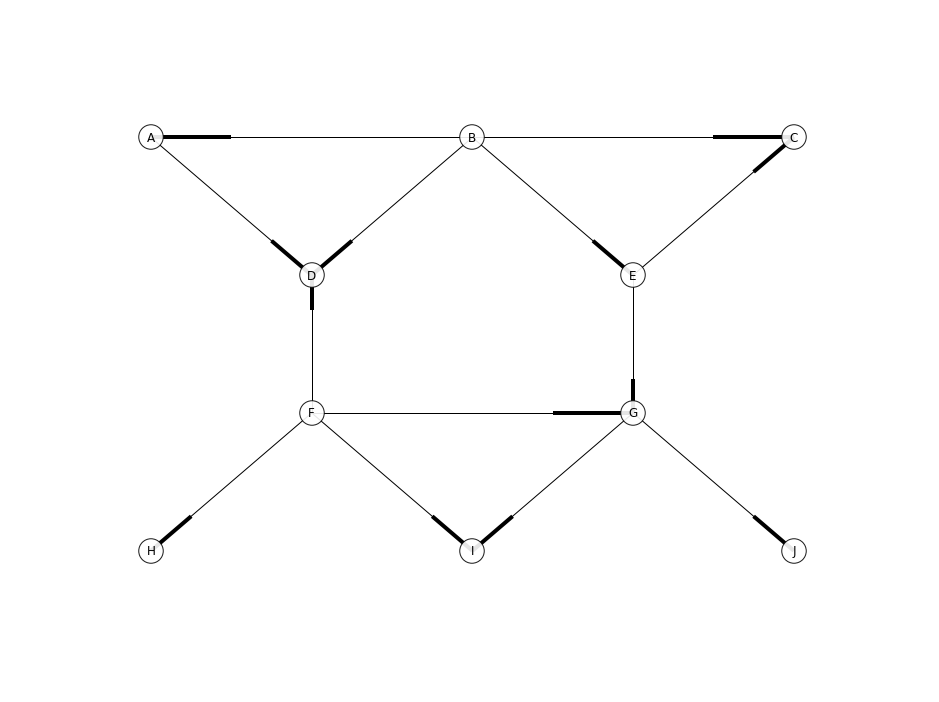

In [39]:
# Directed chordal graph

order = {'A': 8, 'C': 8, 'B': 0, 'E': 2, 'D': 8, 'G': 6, 'F': 2, 'I': 8, 'H': 8, 'K': 8, 'J': 8, 'L': 8, 'D4': 7, 'D2': 4, 'D3': 5, 'D1': 1}

triangulated = nx.DiGraph(title='triangulated')
triangulated.add_nodes_from(ugraph.nodes(data=True))

for e1, e2 in ugraph.edges_iter():
    print '%s(%i) - %s(%i)'%(e1, order.get(e1), e2, order.get(e2))
        #e1,'(',order.get(e1),')','-',e2,'(', order.get(e2),')'
    if order.get(e1) > order.get(e2):
        triangulated.add_edge(e2,e1)
    else:
        triangulated.add_edge(e1,e2)

draw_graph(triangulated, pos_ex)

In [40]:
g = triangulated.copy()

fill_ins = []
for n in g.nodes_iter():
    arcs = list(combinations(g.predecessors(n), 2))
    for a in arcs:
        if a in g.edges():
            # fill_ins.append(a)
            print a, ' exists'
        elif a[::-1] in g.edges():
            # fill_ins.append(a[::-1])
            print a, ' exists'
        else:
            fill_ins.append(a)
        
print triangulated.edges()
print len(fill_ins)
print fill_ins

('B', 'E')  exists
('A', 'B')  exists
('G', 'F')  exists
[('A', 'D'), ('B', 'A'), ('B', 'C'), ('B', 'E'), ('B', 'D'), ('E', 'C'), ('E', 'G'), ('G', 'I'), ('G', 'J'), ('F', 'I'), ('F', 'H'), ('F', 'D'), ('F', 'G')]
3
[('A', 'F'), ('B', 'F'), ('E', 'F')]


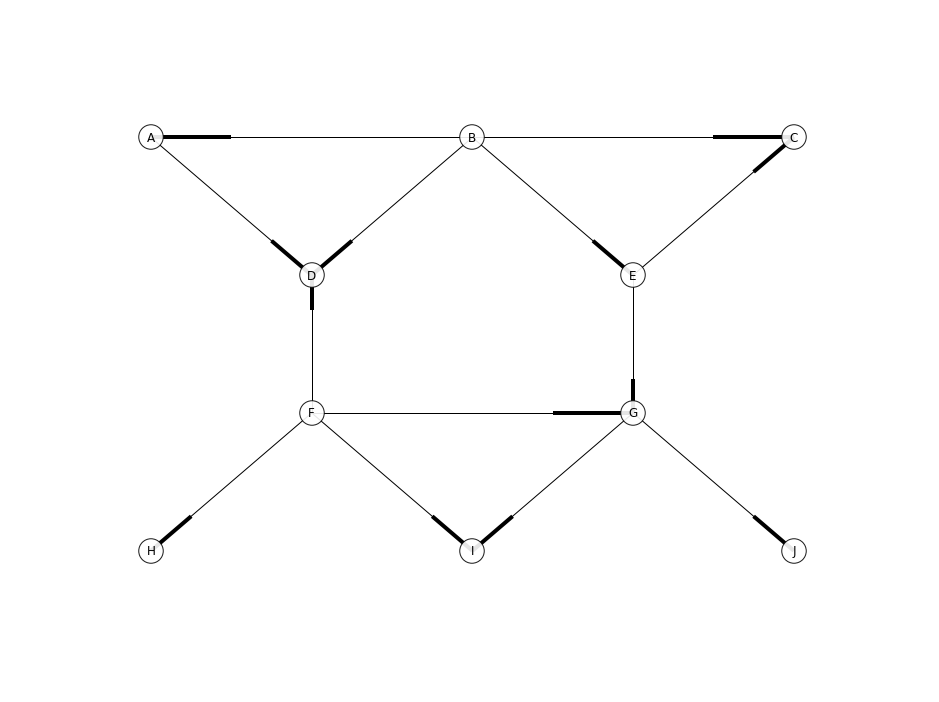

In [41]:
draw_graph(triangulated, pos_ex)